# SymPy
    
    

[SymPy](https://es.wikipedia.org/wiki/SymPy) es una biblioteca de Python que permite realizar cálculos simbólicos.
Nos ofrece las capacidades de álgebra computacional, y se puede usar en línea a través de [SymPy Live](http://live.sympy.org/).

Si usas Anaconda este paquete ya viene instalado por defecto pero si se usa miniconda o pip debe instalarse.

````python
conda install sympy # Usando el gestor conda de Anaconda/Miniconda
pip install sympy # Usando el gestor pip (puede requerir instalar más paquetes)
````


Lo primero que debemos hacer, antes de usarlo, es importar el módulo, como con cualquier
otra biblioteca de Python.

Si deseamos usar SymPy de forma interactiva usamos

```python
from sympy import *
init_printing()
```

Para scripting es mejor importar la biblioteca de la siguiente manera

```python
import sympy as sym
```

Y llamar las funciones de la siguiente manera

```python
x = sym.Symbols("x")
expr = sym.cos(x)**2 + 3*x
deriv = expr.diff(x)
```

en donde calculamos la derivada de  $\cos^2(x) + 3x$,
que debe ser $-2\sin(x)\cos(x) + 3$.

In [1]:
%matplotlib ipympl

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [3]:
init_printing()

Definamos la variable $x$ como un símbolo matemático. Esto nos permite hacer uso de
esta variable en SymPy.

In [4]:
x = symbols("x")

Empecemos con cálculos simples. Abajo, tenemos una _celda de código_ con una suma.
Ubica el cursor en ella y presiona SHIFT + ENTER para evaluarla.


In [5]:
1 + 3

Realicemos algunos cálculos.

In [6]:
factorial(5)

In [7]:
1 // 3

In [8]:
1 / 3

In [9]:
S(1) / 3

Podemos evaluar esta expresión a su versión en punto flotante

In [10]:
sqrt(2*pi)

In [11]:
float(sqrt(2*pi))

También podemos almacenar expresiones como variables, como cualquier variable de Python.


In [12]:
radius = 10
height = 100
area = pi * radius**2
volume = area * height

In [13]:
volume

In [14]:
float(volume)

Hasta ahora, hemos usado SymPy como una calculadora. Intentemos
algunos cálculos más avanzados. Por ejemplo, algunas integrales.


In [15]:
integrate(sin(x), x)

In [16]:
integrate(sin(x), (x, 0, pi))

Podemos definir una función, e integrarla

In [17]:
f = lambda x: x**2 + 5

In [18]:
f(5)

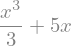

In [19]:
integrate(f(x), x)

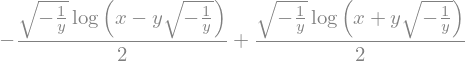

In [20]:
y = symbols("y")
integrate(1/(x**2 + y), x)

Si asumimos que el denominador es positivo, esta expresión se puede simplificar aún más

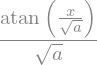

In [21]:
a = symbols("a", positive=True)
integrate(1/(x**2 + a), x)

Hasta ahora, aprendimos lo más básico. Intentemos algunos ejemplos
más complicados ahora.

**Nota:** Si quieres saber más sobre una función específica se puede usar
la función ``help()`` o el comándo _mágico_ de IPython ``??``

In [22]:
help(integrate)

Help on function integrate in module sympy.integrals.integrals:

integrate(*args, meijerg=None, conds='piecewise', risch=None, heurisch=None, manual=None, **kwargs)
    integrate(f, var, ...)
    
    .. deprecated:: 1.6
    
       Using ``integrate()`` with :class:`~.Poly` is deprecated. Use
       :meth:`.Poly.integrate` instead. See :ref:`deprecated-integrate-poly`.
    
    Explanation
    
    Compute definite or indefinite integral of one or more variables
    using Risch-Norman algorithm and table lookup. This procedure is
    able to handle elementary algebraic and transcendental functions
    and also a huge class of special functions, including Airy,
    Bessel, Whittaker and Lambert.
    
    var can be:
    
    - a symbol                   -- indefinite integration
    - a tuple (symbol, a)        -- indefinite integration with result
                                    given with ``a`` replacing ``symbol``
    - a tuple (symbol, a, b)     -- definite integration
    
   

In [23]:
integrate??

Signature:
integrate(
    *args,
    meijerg=None,
    conds='piecewise',
    risch=None,
    heurisch=None,
    manual=None,
    **kwargs,
)
Source:   
def integrate(*args, meijerg=None, conds='piecewise', risch=None, heurisch=None, manual=None, **kwargs):
    """integrate(f, var, ...)

    .. deprecated:: 1.6

       Using ``integrate()`` with :class:`~.Poly` is deprecated. Use
       :meth:`.Poly.integrate` instead. See :ref:`deprecated-integrate-poly`.

    Explanation

    Compute definite or indefinite integral of one or more variables
    using Risch-Norman algorithm and table lookup. This procedure is
    able to handle elementary algebraic and transcendental functions
    and also a huge class of special functions, including Airy,
    Bessel, Whittaker and Lambert.

    var can be:

    - a symbol                   -- indefinite integration
    - a tuple (symbol, a)        -- indefinite integration with result
                                    given with ``a`` replacing ``sy

## Ejemplos

### Solución de ecuaciones algebraicas

Para resolver sistemas de ecuaciones algebraicos podemos usar: 
[``solveset`` and ``solve``](http://docs.sympy.org/latest/tutorial/solvers.html).
El método preferido es ``solveset``, sin embargo, hay sistemas que
se pueden resolver usando ``solve`` y no ``solveset``.

Para resolver sistemas usando ``solveset``:

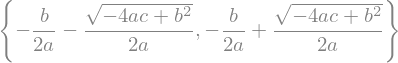

In [24]:
a, b, c = symbols("a b c")
solveset(a*x**2 + b*x + c, x)

Debemos ingresar la expresión igualada a 0, o como una ecuación

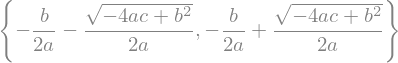

In [25]:
solveset(Eq(a*x**2 + b*x, -c), x)

``solveset`` no permite resolver sistemas de ecuaciones no lineales, por ejemplo


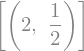

In [26]:
solve([x*y - 1, x - 2], x, y)

### Álgebra lineal

Usamos ``Matrix`` para crear matrices. Las matrices pueden contener variables y expresiones matemáticas.

Usamos el método ``.inv()`` para calcular la inversa, y ``*`` para multiplicar matrices.

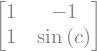

In [27]:
A = Matrix([
        [1, -1],
        [1, sin(c)]
    ])
display(A)

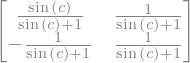

In [28]:
B = A.inv()
display(B)

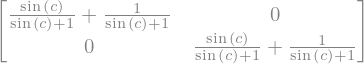

In [29]:
A * B

Esta expresión debería ser la matriz identidad, simplifiquemos la expresión.
Existen varias formas de simplificar expresiones, y ``simplify`` es la más general.

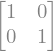

In [30]:
simplify(A * B)

### Graficación

SymPy permite realizar gráficos 2D y 3D

In [31]:
from sympy.plotting import plot3d

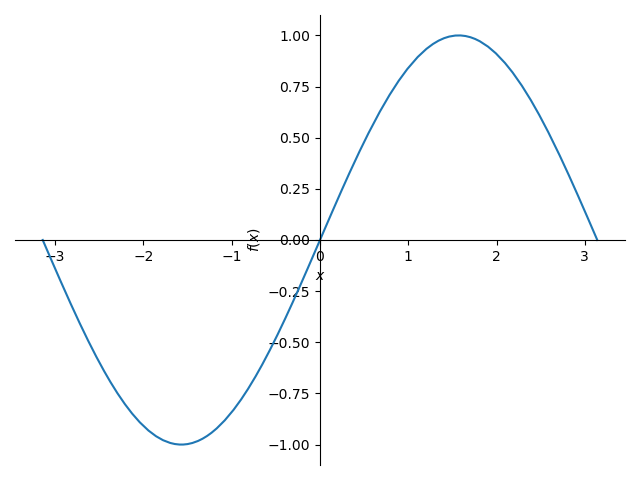

In [32]:
plot(sin(x), (x, -pi, pi));

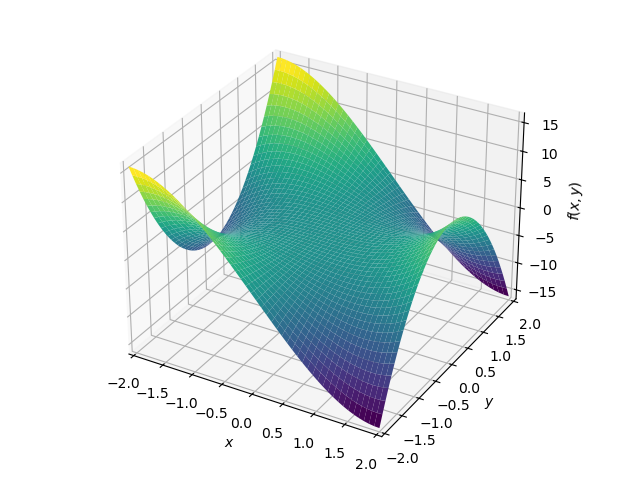

In [33]:
monkey_saddle = x**3 - 3*x*y**2
p = plot3d(monkey_saddle, (x, -2, 2), (y, -2, 2))

### Derivadas y ecuaciones diferenciales

Podemos usar la función ``diff`` o el método ``.diff()`` para calcular derivadas.

In [34]:
f = lambda x: x**2

In [35]:
diff(f(x), x)

In [36]:
f(x).diff(x)

In [37]:
g = lambda x: sin(x)

In [38]:
diff(g(f(x)), x)

Y sí, ¡SymPy sabe sobre la regla de la cadena!

Para terminar, resolvamos una ecuación diferencial de segundo orden

$$ u''(t) + \omega^2 u(t) = 0$$

In [39]:
t = symbols("t")
u = symbols("u", cls=Function)
omega = symbols("omega", positive=True)

In [40]:
ode = u(t).diff(t, 2) + omega**2 * u(t)
dsolve(ode, u(t))

## Convertir expresiones de SymPy en funciones de NumPy

``lambdify`` permite convertir expresiones de sympy en funciones para hacer cálculos usando NumPy.

Veamos cómo.

In [41]:
f = lambdify(x, x**2, "numpy")
f(3)

In [42]:
f(np.array([1, 2, 3]))

array([1, 4, 9])

Intentemos un ejemplo más complejo

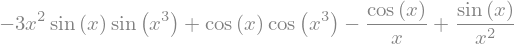

In [43]:
fun = diff(sin(x)*cos(x**3) - sin(x)/x, x)
fun

In [44]:
fun_numpy = lambdify(x, fun, "numpy")

y evalúemoslo en algún intervalo, por ejemplo, $[0, 5]$.

In [45]:
pts = np.linspace(0, 5, 1000)
fun_pts = fun_numpy(pts + 1e-6) # Para evitar división por 0

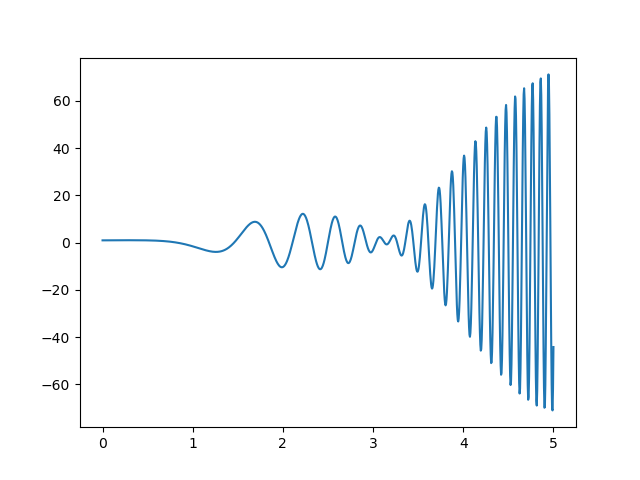

In [46]:
plt.figure()
plt.plot(pts, fun_pts)

## Ejercicios

1. Calcule el límite

  $$ \lim_{x \rightarrow 0} \frac{\sin(x)}{x}\, .$$

2. Resuelva la ecuación diferencial de Bernoulli

  $$x \frac{\mathrm{d} u(x)}{\mathrm{d}x}  + u(x) - u(x)^2 = 0\, .$$


## Recursos adicionales

- Equipo de desarrollo de SymPy. [SymPy Tutorial](http://docs.sympy.org/latest/tutorial/index.html), (2025). Consultado: Agosto 2025.
- Ivan Savov. [Taming math and physics using SymPy](https://minireference.com/static/tutorials/sympy_tutorial.pdf), (2017). Consultado: Agosto 2025.